리듀스
  - 어떤 연산을 적용해서 여러값을 하나의 값으로 줄이는 함수
  - 리스트 또는 배열같은 데이터 구조

In [1]:
from functools import reduce
numbers = [1,2,3,4,5]
total = 1
for i in numbers:
  total *= i

print(total)

120


In [2]:
reduce(lambda x,y : x*y, numbers)

120

리듀스는 리스트컴프리핸션 처럼 if문을 사용할 수 있다

In [4]:
# 주어진 리스트에서 최대값찾기
from functools import reduce
numbers = [10,5,8,7,9,25,15]
print(max(numbers))

reduce(lambda x,y: x if x>y else y, numbers)

25


25

In [5]:
numbers = [1,2,3,4,5]
[ i**2 if i%2==0 else i   for i in numbers ]

[1, 4, 3, 16, 5]

In [7]:
# 문자열 리스트 결합
from functools import reduce
words = ['Hello',' ','World','!']
# join
result = ''.join(words)
print(result)
# reduce
result = reduce(lambda x,y : x+y, words)
print(result)

Hello World!
Hello World!


In [9]:
# 리스트를 하나로 합 치기
list_1 = [
    [10,5],[5,3],[1,2],[3,4],[5,6]
]
# [10,5,5,3,1,2,3,4,5,6]
result = reduce(lambda x,y: x + y, list_1)
print(result)

[10, 5, 5, 3, 1, 2, 3, 4, 5, 6]


In [10]:
# 리스트의 모든 요소를 연결한후 중복을 제거
words = ['apple','banana','orange','banana']
# ['apple','banana','orange']
reduce(lambda x,y : x + [y] if y not in x else x, words, [])

['apple', 'banana', 'orange']

In [ ]:
#     x                     y
# 1 ['apple'] + ['banana'] --> ['apple','banana']
# 2 ['apple'] + ['banana'] + ['orange'] ->['apple','banana','orange']


In [11]:
# 모든 리스트의 원소의 제곱의 합  2**2 + 3**2 + 4**2
numbers = [2,3,4]    # [0,2,3,4]
result = reduce(lambda x,y : x + y**2, numbers,0)  # ((0+2**2) + 3**2) + 4**2
print(result)

29


In [17]:
# 리스트의 각 요소의 길이의 평균
words = ['apple', 'banana', 'orange','melon']
# reduce사용 안하고 구하기
print( sum([ len(i) for i in words ]) / len(words) )
# reduce  사용
print( reduce( lambda x,y : x + y,  [ len(i) for i in words ] )  / len(words) )

5.5
5.5


별표의 사용
  - asterisk
  - 기본연산자로, 단순곱셈이나 제곱의 연산에 사용
  - 특별한 경우 : 함수의 가변인수( * )나 키워드 가변인수(**)
  - 패킹

In [18]:
# 가변인수
def asterisk_test(a, *args) :
  print(a, args)
  print(type(args))

In [19]:
asterisk_test(1,2,3,4,5,6)

1 (2, 3, 4, 5, 6)
<class 'tuple'>


In [25]:
# 키워드 가변 인수  받을때 딕셔너리 형태로 이때 키 값은 문자열
def asterisk_test(a, **args) :
  print(a, args)
  print(type(args))

In [27]:
asterisk_test(1, n1=2, n2=3, n3=4, n4=5, n5=6)

1 {'n1': 2, 'n2': 3, 'n3': 4, 'n4': 5, 'n5': 6}
<class 'dict'>


언패킹

In [30]:
def asterisk_test(a, args) :
  print(a, *args)
  print(type(args))

In [31]:
asterisk_test(1, (2,3,4,5) )

1 2 3 4 5
<class 'tuple'>


In [44]:
# 언패킹
def asterisk_test(a, **args) :
  print(a, args)
  print(type(args))

args = (1,2,3)
print(*args)

# 패킹과 언패킹 응용
# 함수는 패킹으로 데이터를 받고  **args
# 전달할때는 딕셔너리형태를 언패킹해서 함수에 전달한다.
args = {
    'n1':1,'n2':2,'n3':3,'n4':4, 'n5':6
}
asterisk_test(1, **args)   # asterisk_test(1, n1=2, n2=3, n3=4, n4=5, n5=6)
# 딕셔너리를 * 하나로 언패킹하면 키들의 집합을 나타낸다
print(*args)

1 2 3
1 {'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'n5': 6}
<class 'dict'>
n1 n2 n3 n4 n5


In [49]:
list(zip([1,2],[3,4], [5,6]))

[(1, 3, 5), (2, 4, 6)]

In [52]:
list(zip(*[ [1,2],[3,4], [5,6] ]))

[(1, 3, 5), (2, 4, 6)]

In [54]:
for data in zip(*[ [1,2],[3,4], [5,6] ]):
  print(data)
  print(type(data))

(1, 3, 5)
<class 'tuple'>
(2, 4, 6)
<class 'tuple'>


In [57]:
def temp(a,name,age,height,weight,job):
  print(a,name,age,height,weight,job)

params = {
    'name':1,
    'age':2,
    'height':3,
    'weight':4,
    'job':5
}
temp(10,**params)

10 1 2 3 4 5


패킹, 언패킹

In [58]:
#언패킹
a,b,c = [1,2,3]
print(a,b,c)

1 2 3


In [59]:
numbers = [1,2,3,4,5]
first, *rest = numbers
print(first)
print(rest)

1
[2, 3, 4, 5]


In [62]:
# **
info = {'name':'jhone', 'age':30,'city':'seoul'}
def temp1(name,age,city):
  print(name,age,city)

def temp2(**kargs):
  for key,value in kargs.items():
    print(f"key : {key}, value:{value}")

temp1(**info)
temp2(**info)


jhone 30 seoul
key : name, value:jhone
key : age, value:30
key : city, value:seoul


벡터의 연산
   - 각 위치끼리 더한다.
   - [v1,v2...] + [v1,v2...] = [v1+v1,v2+v2...]

In [63]:
a = [2,2]
b = [2,3]
c = [3,5]
#[7,10]
# solution 1 for
result = []
for i in range(len(a)):
  result.append(a[i]+b[i]+c[i])
print(result)

[7, 10]


In [64]:
# solution 2
# for문에 적용되는 명령어가 한개이면 리스트 컴프리핸션 적용 가능
result = [ a[i]+b[i]+c[i] for i in range(len(a)) ]
print(result)

[7, 10]


In [67]:
# solution 3
[ sum(data) for data in zip(a,b,c) ]

[7, 10]

In [68]:
print(*[ a,b, c ])

[2, 2] [2, 3] [3, 5]


In [69]:
[ sum(data) for data in zip(*[ a,b, c ]) ]

[7, 10]

In [70]:
a + b + c  # 리스트 형태끼리 더하는데 벡터 연산으로 취급하는 라이브러리  넘파이.....

[2, 2, 2, 3, 3, 5]

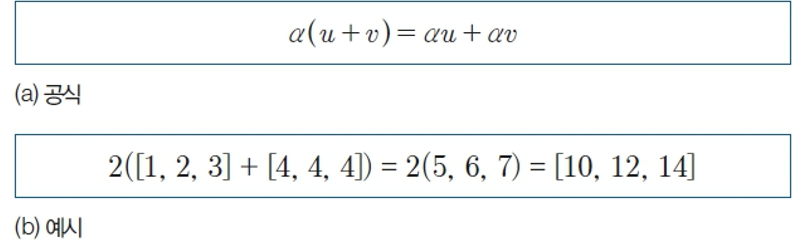

In [74]:
#벡터의 합과 스칼라의 곱
# [1,2,3], [4,4,4]
# [2,4,6] + [8,8,8] = [10,12,14]  분배법칙

# 2(5,6,7) = [10,12,14]
a = [1,2,3]  # 벡터
b = [4,4,4]  # 벡터
alpha = 2
# 2(a+b)
result = [2*sum(data) for data in zip(a,b) ]
result


[10, 12, 14]

행렬의 연산
  - 벡터 연산처럼 각 위치별로 연산
  - 파이썬 이차원 리스트로 표현

In [75]:
ma = [[3,6],[4,5]]
mb = [[5,8],[6,7]]
#[ [8,14], [10,12] ]
# 베이직 솔류션  이중 for문을 이용해서 인덱스를 이용해서 각각의 위치에 해당하는 값을 더한다.
# ma[0][0] --> 3

3